In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import *
from scipy.interpolate import interp1d, interp2d
from scipy.optimize import curve_fit

## Integration

In [42]:
# Define a function.

def function(x):
    return 3*x**2+1.0

# Define limits of integration.

x_lower=0
x_upper=1

# Use the quad() function to evaluate.

definite_integral, err = quad(function,x_lower,x_upper)
print("definite integral: ",definite_integral)
print("error: ", err)

definite integral:  2.0
error:  2.220446049250313e-14


## Interpolation

Interpolation used to estimate the data points between a given set of discrete points.

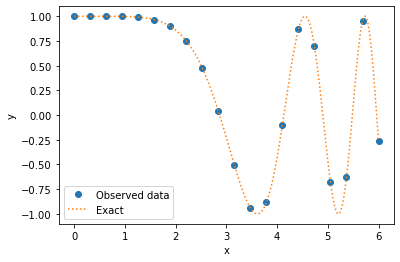

In [43]:
# Generate some fake data and apply a smooth interpolation.

x_observed=np.linspace(0,6,20)
y_observed=np.cos(x_observed**3/15)
xx=np.linspace(0,6,1000)
yy=np.cos(xx**3/15)
plt.plot(x_observed,y_observed, 'o',label='Observed data')
plt.plot(xx,yy,':', label='Exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

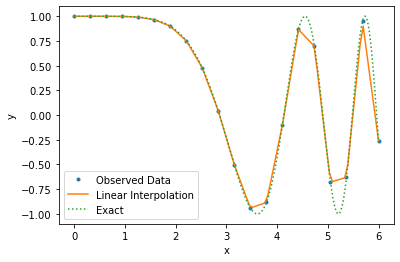

In [44]:
#Applying a linear interpolation.

x_i = np.linspace(0,6,100)
f_lin=interp1d(x_observed,y_observed) # get interpolation function
y_i_lin=f_lin(x_i) # interpolate for y_i at x_i

plt.plot(x_observed,y_observed, '.',label='Observed Data')
plt.plot(x_i,y_i_lin, '-',label='Linear Interpolation')
plt.plot(xx,yy,':', label='Exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

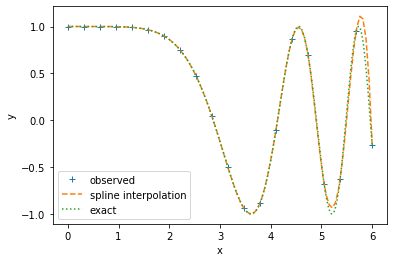

In [45]:
# Applying a spline interpolation.

# Get interpolation function
f_spl=interp1d(x_observed,y_observed, kind='cubic') 

# Interpolate for y_i at x_i
y_i_spl=f_spl(x_i) 

plt.plot(x_observed,y_observed, '+',label='observed')
plt.plot(x_i,y_i_spl, '--',label='spline interpolation')
plt.plot(xx,yy,':', label='exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

## Curve Fitting 

Fitting measured data to a model function. 

(-2.0, 2.0)

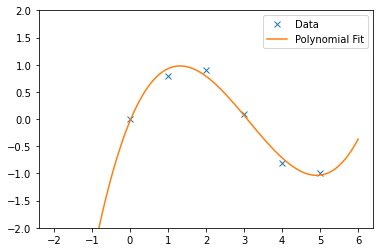

In [46]:
# Using polynomial fits.

x_given=np.array([0,1,2,3,4,5])
y_given=np.array([0,0.8,0.9,0.1,-0.8,-1.0])

x_p=np.linspace(-2,6,100)
p_three=np.polyfit(x_given,y_given,3)
y_p=np.polyval(p_three,x_p)

plt.plot(x_given,y_given,'x')
plt.plot(x_p,y_p,'-')
plt.legend(['Data','Polynomial Fit'],loc='best')
plt.ylim(-2,2)

## Non-linear Regression

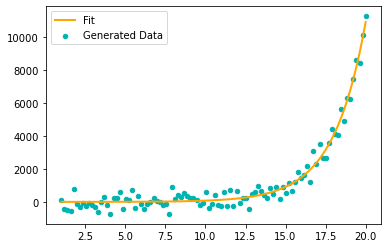

In [56]:
# Using non-linear regression to fit an exponential

# Define the function.

def exponential(x, a, b):
    return a*np.exp(b*x)

# Generate a dataset and calculate associated y values

x_generated = np.linspace(1, 20,100)
y_generated = exponential(x_generated, 0.5, 0.5)

# Add some noise from a Gaussian distribution to the results for realism.

noise = 400*np.random.normal(size=y_generated.size)
y_generated = y_generated + noise

# Plot the data

plt.scatter(x_generated, y_generated, s=20, color='#00b3b3')

# Fit the dummy exponential data
parameters, covariance = curve_fit(f=exponential, xdata=x_generated, ydata=y_generated, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)

std = np.sqrt(np.diag(covariance))

# Calculate the residuals

res = y_generated - exponential(x_generated, *parameters)

# Plot the fit data

plt.plot(x_generated, exponential(x_generated, *parameters), linestyle='-', linewidth=2, color='orange')

plt.legend(['Fit', 'Generated Data'],loc='best')
